In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
#!pip install nltk

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [4]:
#nltk.download_shell()

In [5]:
message = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1')
message.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
message.drop(axis = 1,columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)
message.columns = ['lable', 'message']
message.head()

,lable,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
message.describe()

,lable,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
message.groupby('lable').describe().reset_index()

lable message                                                               
          count unique                                                top freq
0   ham    4825   4516                             Sorry, I'll call later   30
1  spam     747    653  Please call our customer service representativ...    4

<Axes: xlabel='lable', ylabel='Count'>

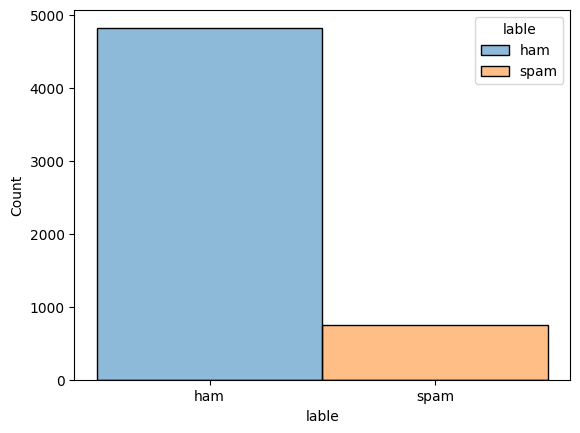

In [9]:
sns.histplot(data = message, x= 'lable',hue= message.lable)

In [10]:
message['length'] = message.message.apply(len)

In [11]:
message.head()

,lable,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='lable', ylabel='length'>

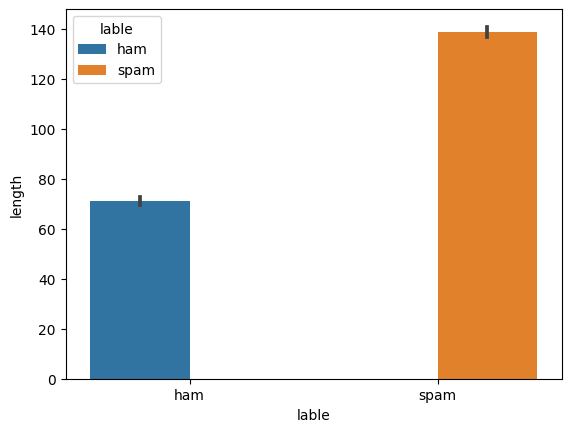

In [12]:
sns.barplot(data = message, x= 'lable', y = 'length',hue= message.lable)

#### There is more characters in spam messages

<Axes: ylabel='Frequency'>

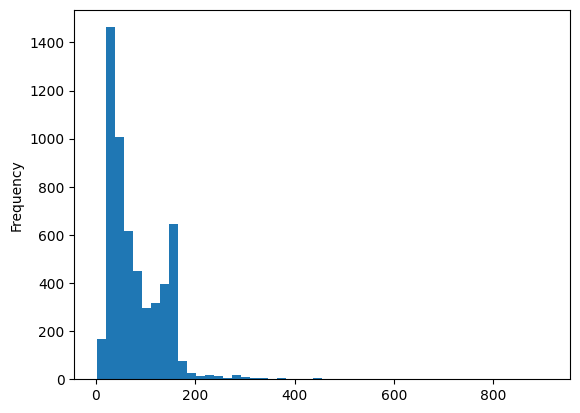

In [13]:
message['length'].plot.hist(bins = 50)

In [14]:
message.describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [15]:
message[message.length == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

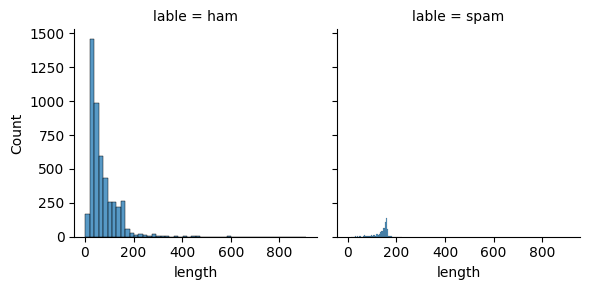

In [16]:
sns.FacetGrid(data = message, col = 'lable').map(sns.histplot, 'length', bins = 50)

#### Now we remove the stop words and the punctuations

In [17]:
import string
from nltk.corpus import stopwords

In [18]:
def remove_punc(mess):
    mess = [c for c in mess if c not in string.punctuation]
    mess = ''.join(mess)
    return mess

mess = 'This is a sentance with, punctuaions: 1.) 2.) 3.)'

mod = remove_punc(mess)

print(mod)


This is a sentance with punctuaions 1 2 3


In [19]:
def remove_stopwords(mess):
    lst = mess.split(' ')
    mess = [word for word in lst if word not in stopwords.words('english')]
    return mess

#### Now we make a function to remove the stop words and the punctuation and return the clean set of words

In [20]:
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stop words
    3. return message
    '''
    nopunc = remove_punc(mess)
    nostop = remove_stopwords(mess)
    return nostop

In [21]:
message['message'].head(10).apply(text_process)

0    [Go, jurong, point,, crazy.., Available, bugis...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3    [U, dun, say, early, hor..., U, c, already, sa...
4    [Nah, I, think, goes, usf,, lives, around, tho...
5    [FreeMsg, Hey, darling, 3, week's, word, back!...
6    [Even, brother, like, speak, me., They, treat,...
7    [As, per, request, 'Melle, Melle, (Oru, Minnam...
8    [WINNER!!, As, valued, network, customer, sele...
9    [Had, mobile, 11, months, more?, U, R, entitle...
Name: message, dtype: object

#### Count how many times does a word occur in each message(known as term frequency)
#### Weigh the counts so that the frequent tokens get lower weight (inverse document frequency)
#### Normalize the vectors to unit lenght, to abstract from the original text length (L2 morm)

#### Now we use a count vectorizer to create a 2-D sparse matrix with the message as columns and the word counts as indexs (number of times a particular word has occoured in the message)

In [22]:
message.columns

Index(['lable', 'message', 'length'], dtype='object')

In [23]:
X = message['message']
y = pd.Series(map(lambda x:1 if x=='ham' else 0,message['lable']))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(X_train)#fit(message['message'])

In [26]:
print(len(bow_transformer.vocabulary_))

12088


#### number of unique and useful words is given above

In [27]:
message['message'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [28]:
bow5 = bow_transformer.transform([message['message'][4]])
print(bow5)

  (0, 2325)	1
  (0, 2958)	1
  (0, 4849)	1
  (0, 7073)	1
  (0, 8134)	1
  (0, 10973)	1
  (0, 10995)	1
  (0, 11394)	1


In [29]:
bow5.nnz

8

#### number of unique words with the stop words removed

In [30]:
bow_transformer.get_feature_names_out()[10000]

'sashimi...'

In [31]:
message_bow = bow_transformer.transform(X_train)

In [32]:
message_bow.nnz

39621

#### The number of non zero elemnts in the sparse matrix is given above

In [33]:
print('Shape of the Sparse Matrix: ', message_bow.shape)

Shape of the Sparse Matrix:  (3733, 12088)


#### We now take the sparse matrix and assign the TF-IDF numbers to the corresponding words. The greater the number the lesser will be the score of the corresponding word (feature in the sparse matrix)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [36]:
tfidf5 = tfidf_transformer.transform(bow5)

In [37]:
print(tfidf5)

  (0, 11394)	0.4513513217842967
  (0, 10995)	0.3780157230718993
  (0, 10973)	0.26105187616541176
  (0, 8134)	0.4513513217842967
  (0, 7073)	0.3447620406741026
  (0, 4849)	0.29844934850101335
  (0, 2958)	0.3932342348207544
  (0, 2325)	0.1376733741962067


In [38]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['University']]

8.532088143541722

In [39]:
bow_transformer.vocabulary_['University']

4059

In [40]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['Find']]

8.126623035433559

In [41]:
bow_transformer.vocabulary_['Find']

1942

In [42]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['Free']]

6.089741108172518

In [43]:
bow_transformer.vocabulary_['Free']

1965

In [44]:
messages_tfidf = tfidf_transformer.transform(message_bow)

#### for each of the non-zero elements in the sparse matrix we now have a corresponding numberthat represents the weight of that word with respect to the entire corpus of words. The non zero elemenst correspond to the occourances of the unique woords for each message

In [45]:
print(messages_tfidf[5])

  (0, 9788)	0.16820296468839976
  (0, 9496)	0.2119338196008167
  (0, 9092)	0.243335865421394
  (0, 8510)	0.2648524924558953
  (0, 5701)	0.20444768364451033
  (0, 4943)	0.19337580460277243
  (0, 4391)	0.12482670236561326
  (0, 3719)	0.2119338196008167
  (0, 3512)	0.2648524924558953
  (0, 3495)	0.2648524924558953
  (0, 3233)	0.2648524924558953
  (0, 3126)	0.2648524924558953
  (0, 1969)	0.2648524924558953
  (0, 1898)	0.16254335148083238
  (0, 1641)	0.2648524924558953
  (0, 1423)	0.2648524924558953
  (0, 879)	0.2648524924558953
  (0, 90)	0.2648524924558953


#### Now we can user Classifers to classify spam vs ham from the vector set

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [47]:
y_train.shape

(3733,)

In [48]:
messages_tfidf.shape

(3733, 12088)

In [49]:
ham_detection = MultinomialNB().fit(messages_tfidf, y_train)

In [50]:
ham_detection.predict(messages_tfidf[50])

array([1])

#### Now we make a pipeline to manage the workflow of the entire process as we would need to do the same process for the test set as well 

In [51]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
], verbose=True)

In [52]:
pipeline.fit(X_train,y_train)

[Pipeline] ............... (step 1 of 3) Processing bow, total=   7.1s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7de4d9409120>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())],
         verbose=True)

In [53]:
print(X_train.shape, y_train.shape)

(3733,) (3733,)


In [54]:
print(X_test.shape, y_test.shape)

(1839,) (1839,)


In [55]:
prediction = pipeline.predict(X_test)

In [56]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       244
           1       0.94      1.00      0.97      1595

    accuracy                           0.95      1839
   macro avg       0.97      0.81      0.86      1839
weighted avg       0.95      0.95      0.94      1839



### We have 96% accuracy for this model
### Looking forward to the doing the same classifications using pretrained models